**Importing Libraries and Reading the file**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#from google.colab import drive
#drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
file = 'Online Retail.xlsx'
data = pd.ExcelFile(file)
print(data.sheet_names)

['Online Retail']


In [ ]:
dataframe = data.parse('Online Retail')

KeyboardInterrupt: 

**EDA and Cleaning**

In [ ]:
dataframe.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
dataframe.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539948 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539948 non-null  object        
 1   StockCode    539948 non-null  object        
 2   Description  539948 non-null  object        
 3   Quantity     539948 non-null  int64         
 4   InvoiceDate  539948 non-null  datetime64[ns]
 5   UnitPrice    539948 non-null  float64       
 6   CustomerID   539948 non-null  float64       
 7   Country      539948 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [ ]:
#I get statistical measures and see that some values below 0 which can't happen with quantitative data from sales. That's wrong!
dataframe.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,539948.000000,539948,539948.000000,539948.000000
mean,10.160565,2011-07-04 15:52:11.838917632,4.107535,15919.354858
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 10:25:00,1.250000,14367.000000
50%,3.000000,2011-07-20 11:38:00,2.080000,16241.000000
75%,10.000000,2011-10-19 11:52:00,4.130000,17841.000000
max,4800.000000,2011-12-09 12:50:00,4575.640000,18287.000000
std,38.477850,NaN,32.412967,1849.948456


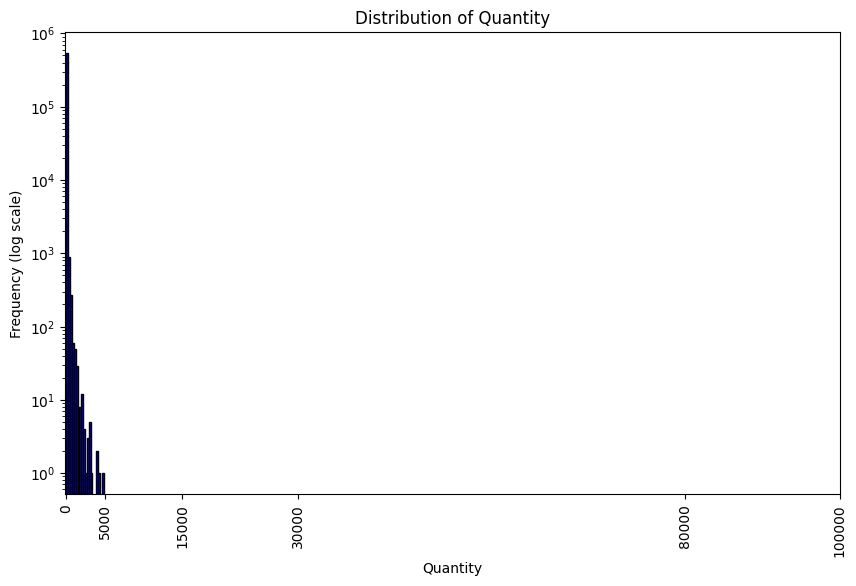

In [ ]:
#I want to see the distribution of the 'Quantity' column
x_ticks = [0, 5000, 15000, 30000,80000, 100000]
plt.figure(figsize=(10, 6))
plt.hist(dataframe['Quantity'], bins=20, color='blue', edgecolor='black')
plt.yscale('log')  # Use a logarithmic scale on the y-axis for better visualization
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency (log scale)')
plt.xticks(x_ticks, rotation=90)
plt.show()

*As we see above there are outliers below 0 and higher than 10,000, which is illogical. So, now we are going to assign all these outliers the number equal to the median, without considering the numbers from outliers, which would give not accurate amount

In [ ]:
#in this code I calculate the median quantity without considering outliers as you see above in the histogram
condition = (dataframe['Quantity'] >= 0) & (dataframe['Quantity'] <=5000)
median_quantity_without_outliers = np.median(dataframe.loc[condition, 'Quantity'])
median_quantity_without_outliers

np.float64(3.0)

In [ ]:
#Here I give the median quantity to our outliers
# Define the conditions for outliers
outlier_condition = (dataframe['Quantity'] < 0) | (dataframe['Quantity'] > 5000)
# Assigning the median value to the outlier values in Quantity
dataframe.loc[outlier_condition, 'Quantity'] = median_quantity_without_outliers
dataframe['Quantity'].median()

3.0

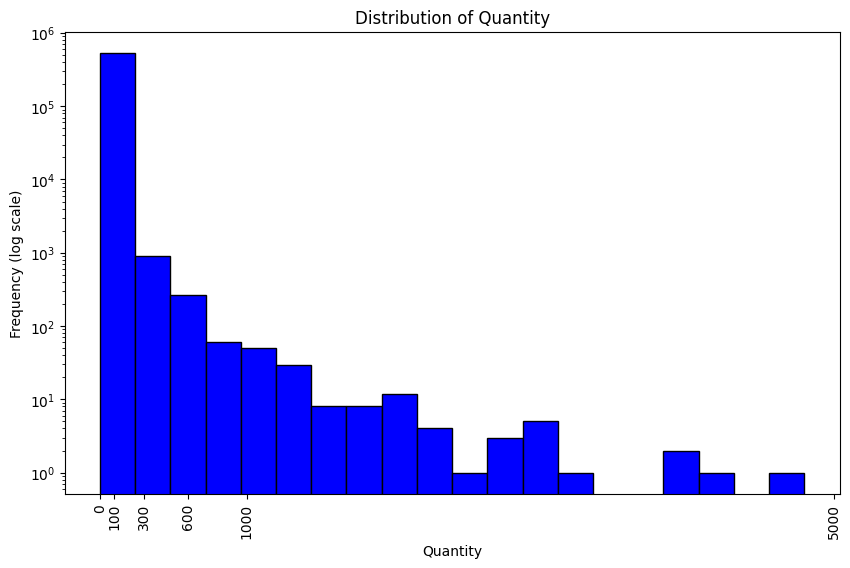

In [ ]:
#rechecking the distribution of the Quantity and finally its fine now within the logical range of 0 to 5000 maximum
x_ticks = [0, 100,300, 600, 1000, 5000,]
plt.figure(figsize=(10, 6))
plt.hist(dataframe['Quantity'], bins=20, color='blue', edgecolor='black')
plt.yscale('log')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency (log scale)')
plt.xticks(x_ticks, rotation=90)
plt.show()

*As we can see from the above histogram, now we have more logical numbers for our 'Quantity' column*





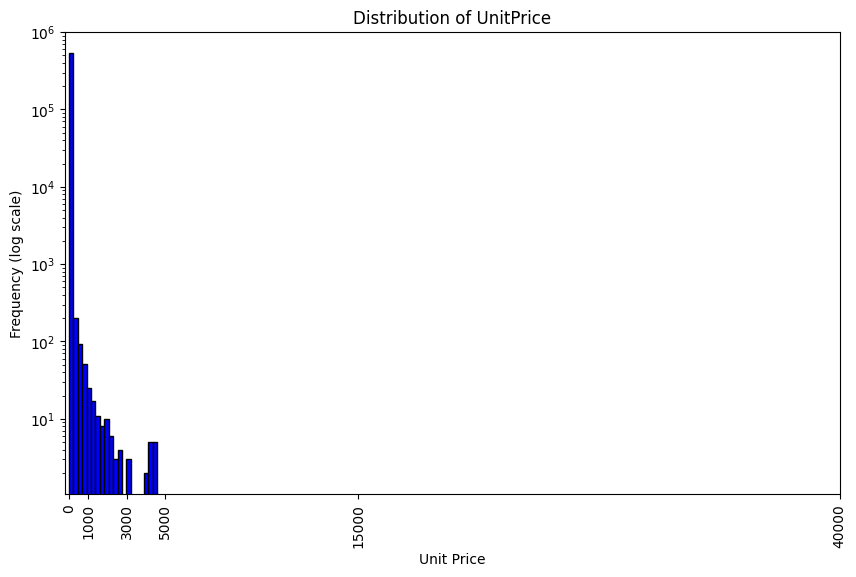

In [ ]:
#as with 'Quantity' column we want to remove the outliers from our 'UnitPrice' column by first looking into distribution with histogram
x_ticks = [0,1000,3000, 5000, 15000, 40000]
plt.figure(figsize=(10, 6))
plt.hist(dataframe['UnitPrice'], bins=20, color='blue', edgecolor='black')
plt.yscale('log')  # Use a logarithmic scale on the y-axis for better visualization
plt.title('Distribution of UnitPrice')
plt.xlabel('Unit Price')
plt.ylabel('Frequency (log scale)')
plt.xticks(x_ticks, rotation=90)
plt.show()

In [ ]:
#in this code I calculate the median quantity without considering outliers as you see above in the histogram
condition2 = (dataframe['UnitPrice'] >= 0) & (dataframe['UnitPrice'] <=5000)
median_price_without_outliers = np.median(dataframe.loc[condition, 'UnitPrice'])
median_price_without_outliers

np.float64(2.08)

In [ ]:
#Here I give the median quantity to our outliers
# Define the conditions for outliers
outlier_condition = (dataframe['UnitPrice'] < 0) | (dataframe['UnitPrice'] > 5000)
# Assigning the median value to the outlier values in Quantity
dataframe.loc[outlier_condition, 'UnitPrice'] = median_price_without_outliers
dataframe['UnitPrice'].median()

2.08

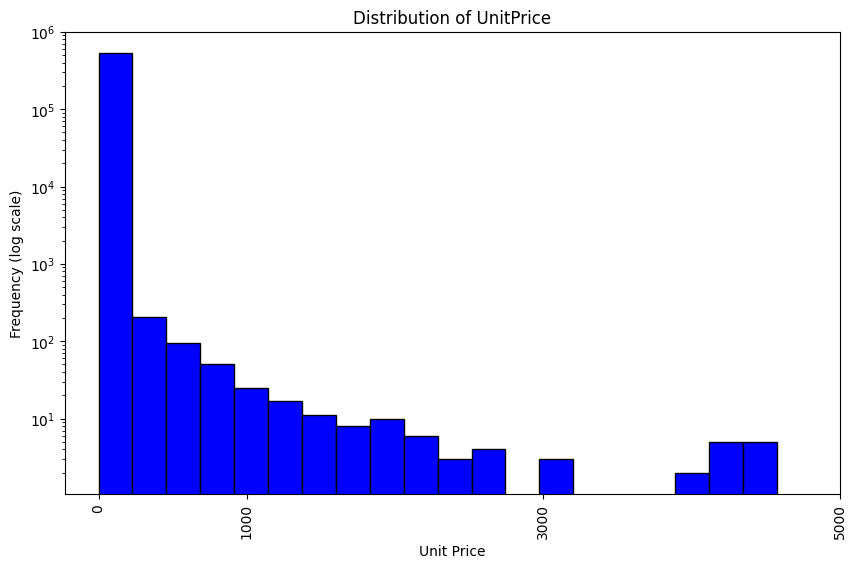

In [ ]:
#now the distribution is more logical. I didn't remove the Unit price closer to 4000 because there might be some expensive items in the store
x_ticks = [0,1000,3000, 5000]
plt.figure(figsize=(10, 6))
plt.hist(dataframe['UnitPrice'], bins=20, color='blue', edgecolor='black')
plt.yscale('log')
plt.title('Distribution of UnitPrice')
plt.xlabel('Unit Price')
plt.ylabel('Frequency (log scale)')
plt.xticks(x_ticks, rotation=90)
plt.show()

In [ ]:
#rechecking if my correction we applied
dataframe.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,539948.000000,539948,539948.000000,539948.000000
mean,10.160565,2011-07-04 15:52:11.838917632,4.107535,15919.354858
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 10:25:00,1.250000,14367.000000
50%,3.000000,2011-07-20 11:38:00,2.080000,16241.000000
75%,10.000000,2011-10-19 11:52:00,4.130000,17841.000000
max,4800.000000,2011-12-09 12:50:00,4575.640000,18287.000000
std,38.477850,NaN,32.412967,1849.948456


In [ ]:
#checking for missing values
dataframe.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
#The quantity of the 'NaN" values in 'Description' column are so low so we can drop them, as they don't affect the analysis much
dataframe.dropna(subset=['Description', 'InvoiceDate'], inplace=True)

In [ ]:
#'Nan' in 'CustomerID' is high and We can't just drop 25% of our data. I will give mode value to them because I won't use 'CustomerID' for any purposes
customer_id_mode = dataframe['CustomerID'].mode()[0]

In [ ]:
dataframe['CustomerID'] = dataframe['CustomerID'].fillna(customer_id_mode)

In [ ]:
#rechecking to ensure we don't have missing values
dataframe.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
#looking into 'Country' if there are any suspicious or wrong words(~there are some)
dataframe['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Brazil', 'USA', 'Malta',
       'South Africa'], dtype=object)

In [ ]:
#changing the name 'EIRE' which in Irish means Ireland and RSA to South Africa for better understanding
dataframe['Country'] = dataframe['Country'].str.replace('EIRE', 'Ireland')
dataframe['Country'] = dataframe['Country'].str.replace('RSA', 'South Africa')

In [ ]:
#removing the 'Unspecified' word from 'Country' column because it is not a specified country and we don't need it
dataframe.drop(dataframe[dataframe['Country'] == 'Unspecified'].index, inplace=True)
dataframe.drop(dataframe[dataframe['Country'] == 'European Community'].index, inplace=True)

In [ ]:
#checking the countries included in our column. Now, everything is fine
dataframe['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Brazil', 'USA', 'Malta',
       'South Africa'], dtype=object)

*The 'InvoiceNo' column has some cancelled transactions (Invoices with C in it), so we are not going to include them in our analysis for now. That's why we will filter the data to select only purchasing transactions below*

In [ ]:
#selecting only the strings that don't have 'C' value in 'InvoiceNo'
dataframe['InvoiceNo'] = dataframe['InvoiceNo'].astype(str)
clean_data = dataframe[~dataframe['InvoiceNo'].str.contains('c', case=False)]
clean_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
clean_data.shape


(530661, 8)

In [ ]:
dataframe.shape

(539948, 8)

*We see the difference in the rows of ***clean_data** and **dataframe** is more than 9000 rows, which means we have removed all the cancelled transactions from **dataframe** and included only purchased invoices in the **clean_data**

In [ ]:
#ensuring if we have removed all the cancelled 'C' invoices from our 'InvoiceNo' column
list = clean_data['InvoiceNo'].unique()
for item in list:
    if 'C' in item:
        print(f"{item} contains 'C'")

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530661 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530661 non-null  object        
 1   StockCode    530661 non-null  object        
 2   Description  530661 non-null  object        
 3   Quantity     530661 non-null  int64         
 4   InvoiceDate  530661 non-null  datetime64[ns]
 5   UnitPrice    530661 non-null  float64       
 6   CustomerID   530661 non-null  float64       
 7   Country      530661 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


**Time Series Analysis**

In [ ]:
clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate'], errors='coerce')
#clean_data.set_index('InvoiceDate', inplace=True)

/tmp/ipython-input-1100453436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate'], errors='coerce')


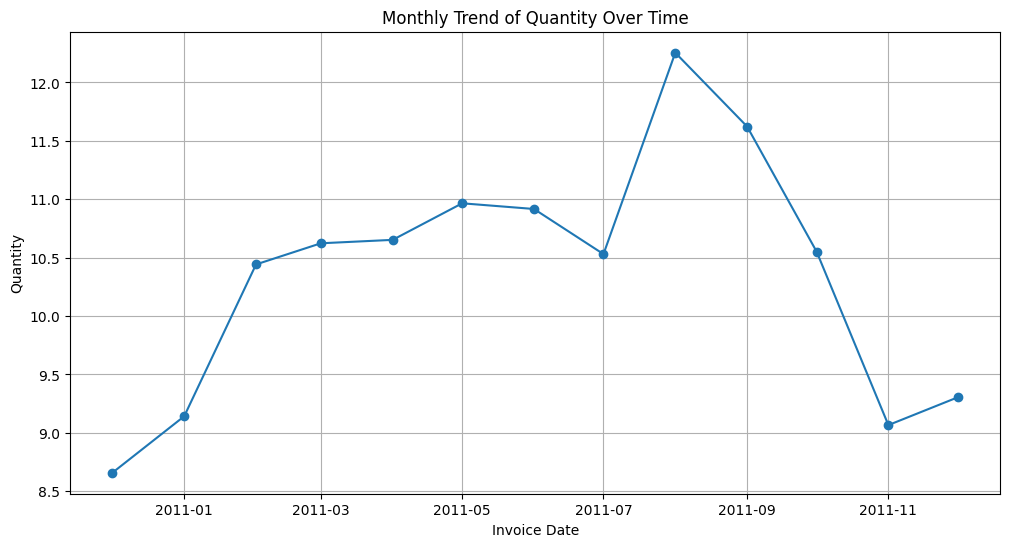

In [ ]:
#here we will check Monthly Average Sales Quantity over the period
clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate'], errors='coerce')
clean_data = clean_data.dropna(subset=['InvoiceDate'])
clean_data['YearMonth'] = clean_data['InvoiceDate'].dt.to_period('M')
monthly_data = clean_data.groupby('YearMonth')['Quantity'].mean().reset_index()
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Quantity'], marker='o')
plt.title('Monthly Trend of Quantity Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

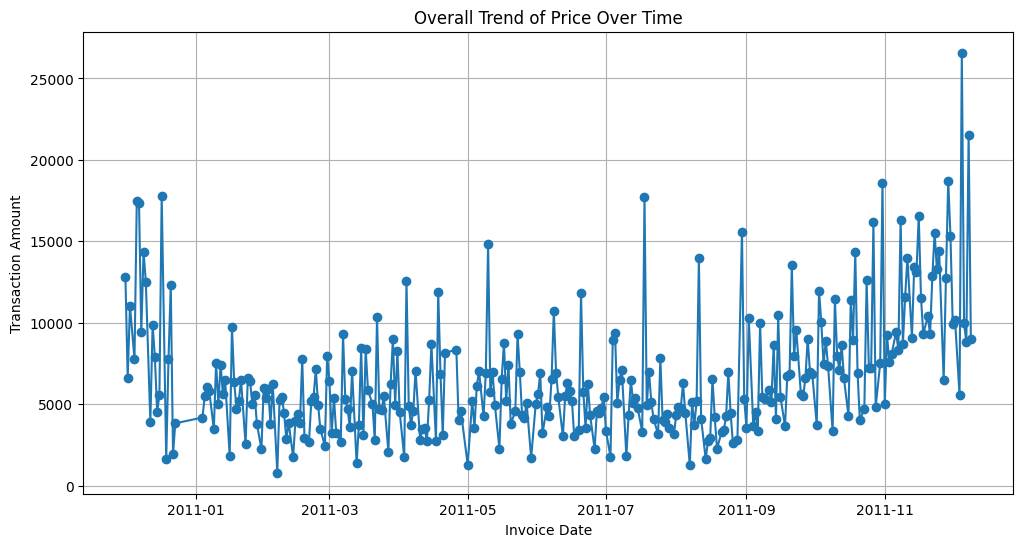

In [ ]:
#daily Sales over the period
daily_data = clean_data.groupby(clean_data['InvoiceDate'].dt.date)['UnitPrice'].sum().reset_index()
daily_data['InvoiceDate'] = pd.to_datetime(daily_data['InvoiceDate'])

plt.figure(figsize=(12, 6))
plt.plot(daily_data['InvoiceDate'], daily_data['UnitPrice'], marker='o')
plt.title('Overall Trend of Price Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

**Geographic Analysis**

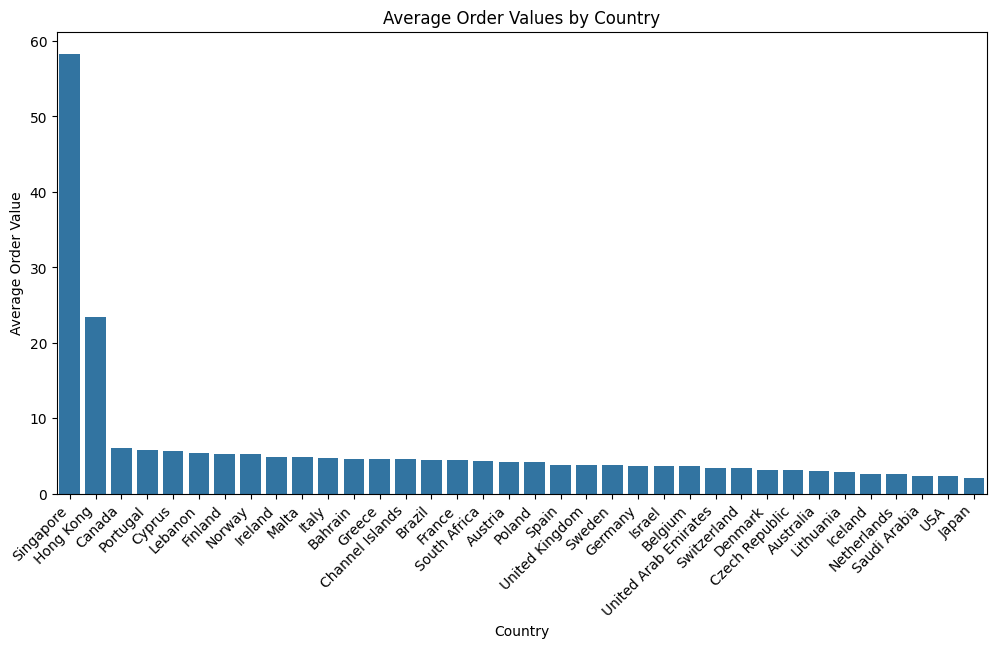

In [ ]:
# Calculate average order values by country
avg_order_values = clean_data.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)

# Plot bar chart for average order values
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_order_values.index, y=avg_order_values.values)
plt.title('Average Order Values by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.show()

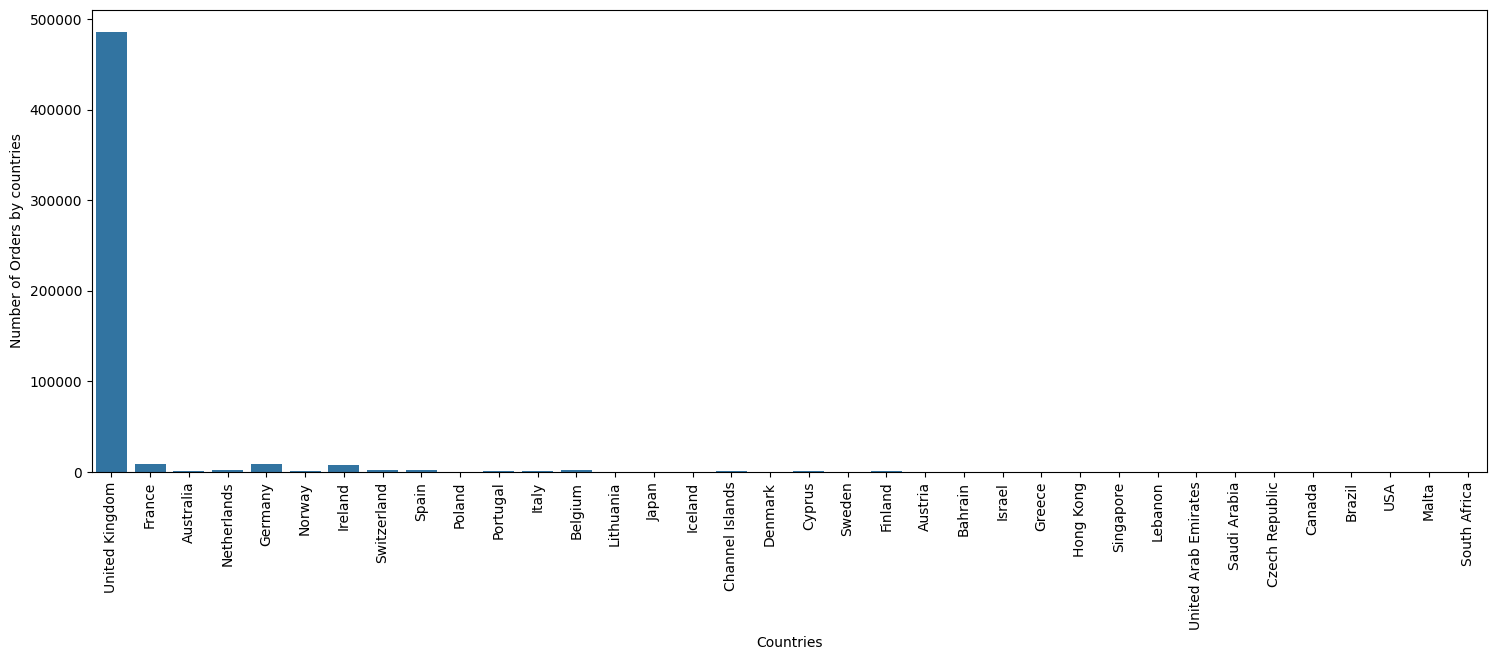

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=clean_data['Country'])
plt.ylabel('Number of Orders by countries')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.show()

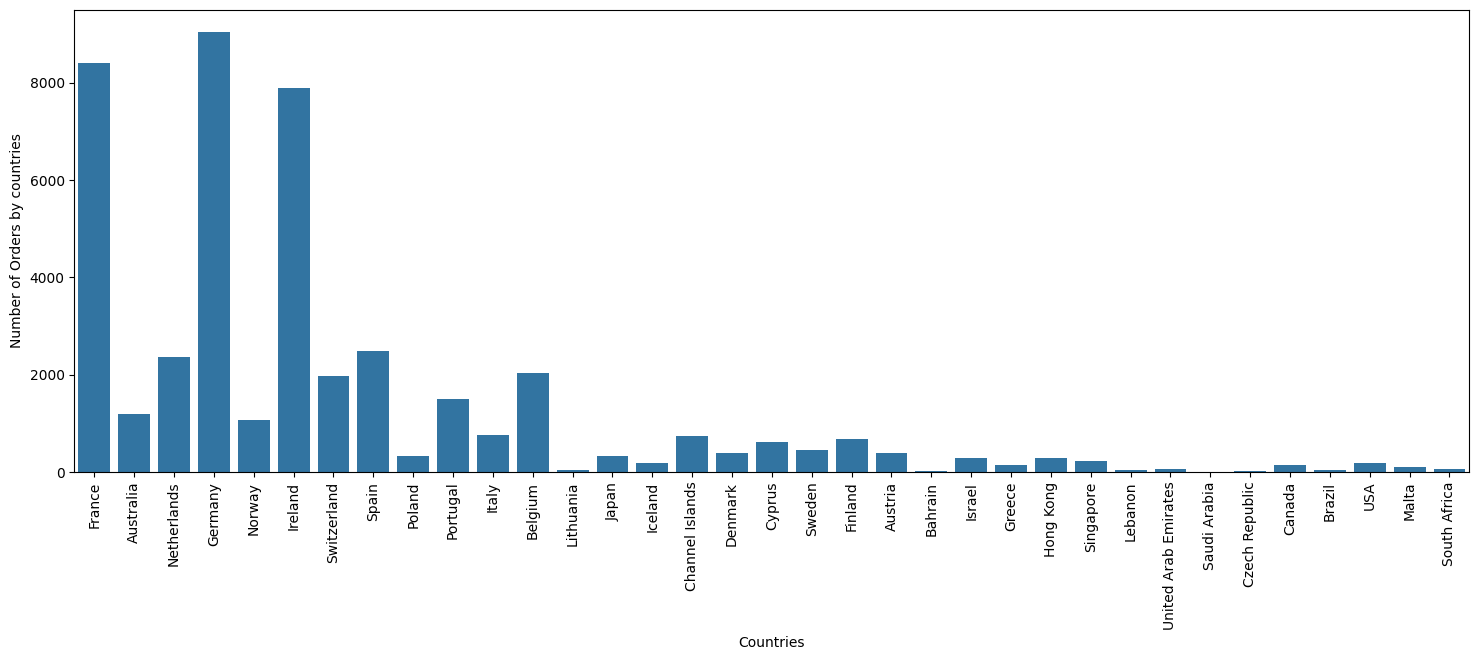

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=clean_data[clean_data['Country'] != 'United Kingdom']['Country'])
plt.ylabel('Number of Orders by countries')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.show()

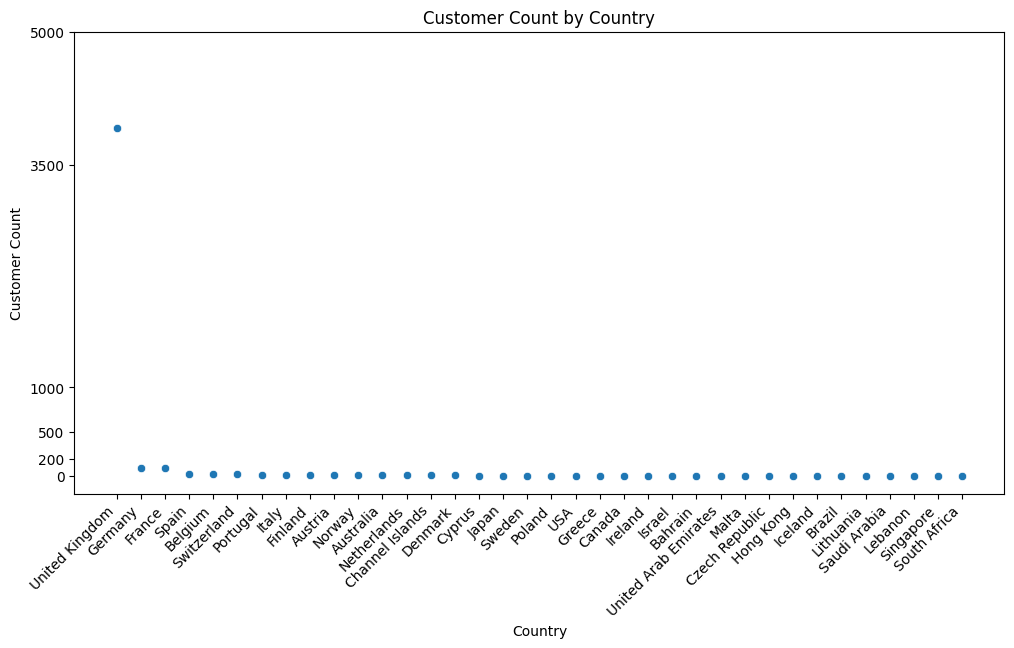

In [ ]:

customer_count = clean_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
y_ticks = [0,200,500, 1000,3500, 5000]

plt.figure(figsize=(12, 6))
sns.scatterplot(x=customer_count.index, y=customer_count.values)
plt.title('Customer Count by Country')
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.xticks(rotation=45, ha='right')
plt.yticks(y_ticks)
plt.show()


/tmp/ipython-input-3684904910.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_order_values_per_customer = clean_data.groupby('Country').apply(lambda x: x['UnitPrice'].sum() / x['CustomerID'].nunique()).sort_values(ascending=False)


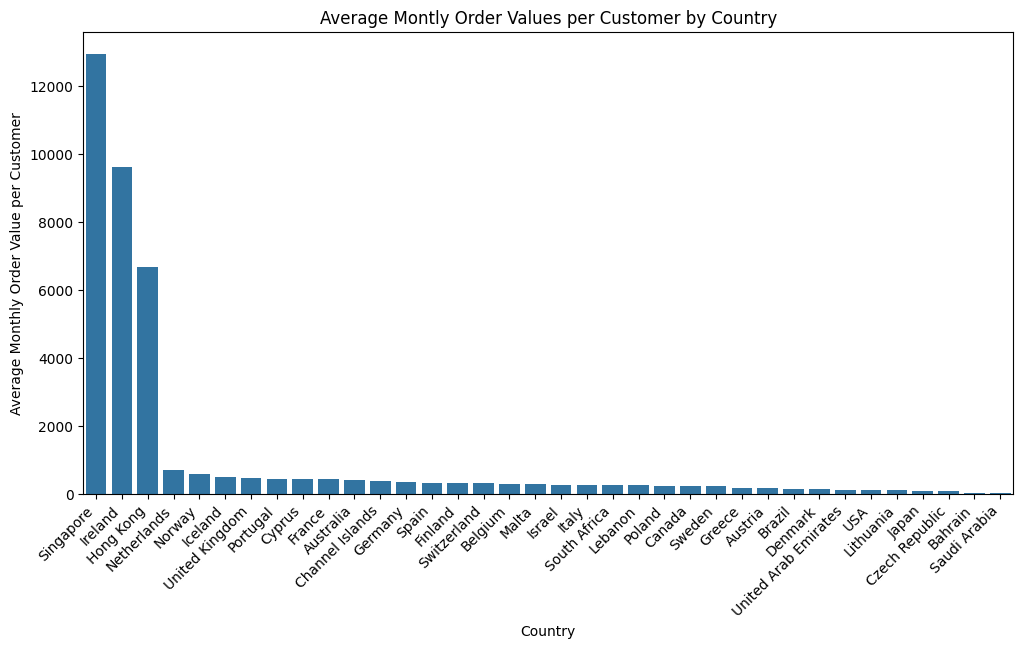

In [ ]:
avg_order_values_per_customer = clean_data.groupby('Country').apply(lambda x: x['UnitPrice'].sum() / x['CustomerID'].nunique()).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_order_values_per_customer.index, y=avg_order_values_per_customer.values)
plt.title('Average Montly Order Values per Customer by Country')
plt.xlabel('Country')
plt.ylabel('Average Monthly Order Value per Customer')
plt.xticks(rotation=45, ha='right')
plt.show()

**Customer Segmentation**

In [ ]:
clean_data['TotalAmount'] = clean_data['UnitPrice'] * clean_data['Quantity']

NameError: name 'ScalarFormatter' is not defined

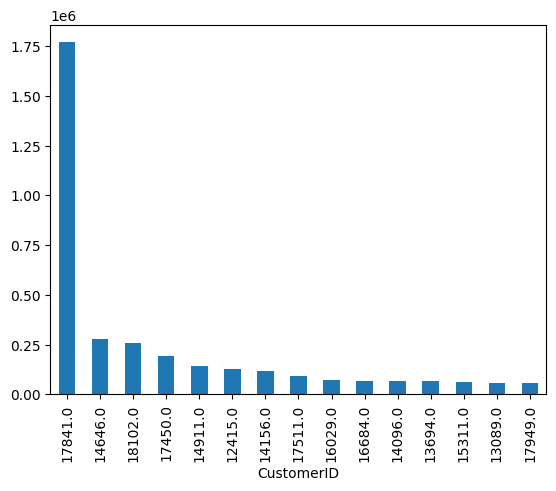

In [ ]:
clean_data.groupby('CustomerID')['TotalAmount'].sum().nlargest(15) .plot.bar();
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel("Total Purchase Amount (in Pounds)")
plt.show()

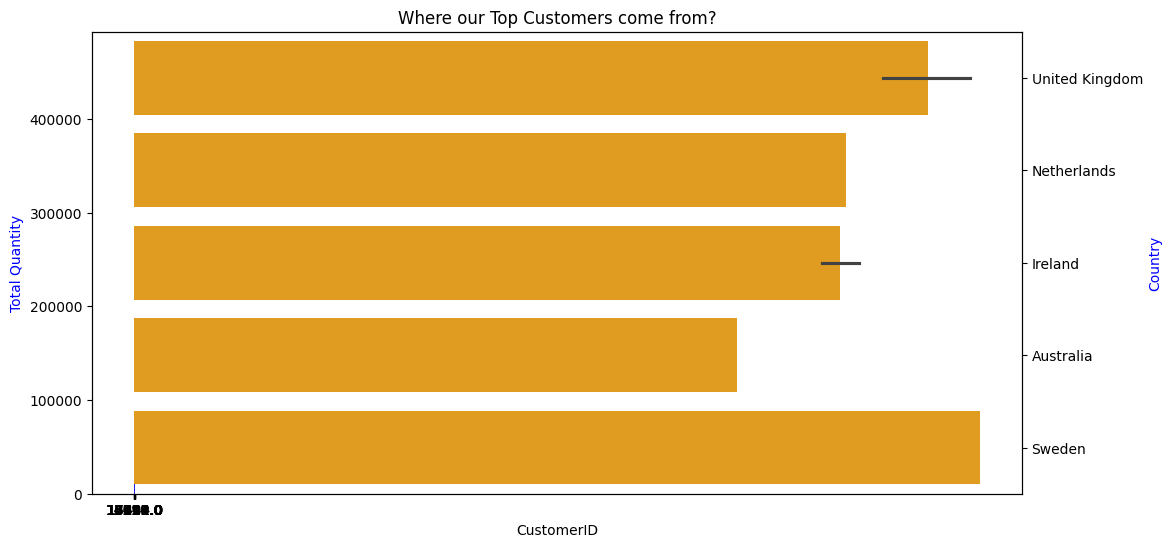

In [ ]:
customer_data = clean_data.groupby('CustomerID').agg({'Quantity': 'sum', 'Country': 'first'}).nlargest(15, 'Quantity')
customer_data.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='Quantity', data=customer_data, color='blue')
plt.ylabel("Total Quantity", color='blue')
ax2 = plt.gca().twinx()
sns.barplot(x='CustomerID', y='Country', data=customer_data, color='orange', ax=ax2)
plt.ylabel("Country", color='blue')
plt.title("Where our Top Customers come from?")
plt.show()


NameError: name 'ScalarFormatter' is not defined

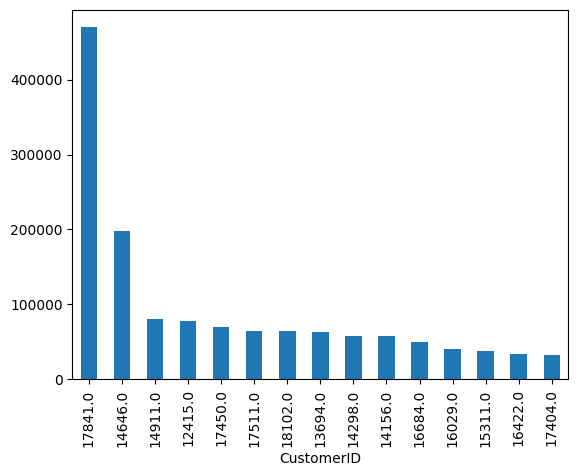

In [ ]:
clean_data.groupby('CustomerID')['Quantity'].sum().nlargest(15) .plot.bar();
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel("Total Quantity")
plt.show()

**Product Classification and Clusterization**

*Using K-Clusterization or any other unsupervised Algorithm is not efficient in our case because all the unsupervised Text Structuring Algorithms select similar **WORDS** only. Example is there are brand items that go to a different groups(Kitchen appliences, furniture, women accessories, bottles etc). The second is there are items starting with the word **SET of 10, SET of 6** etc, and based on the word **SET** Algorithm would select this word and classify it as a group. Eventually, I want to say unsupervised Algorithms are inaccurate in our case, we need to have a supervised Algorithm with the train and test data where, we can refer to the trained data and have more accurate results. We didn't have any trained data to work with, so we just decided to take the 15 top most sold by Quantity and by Total Sales.*

/tmp/ipython-input-2791230173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


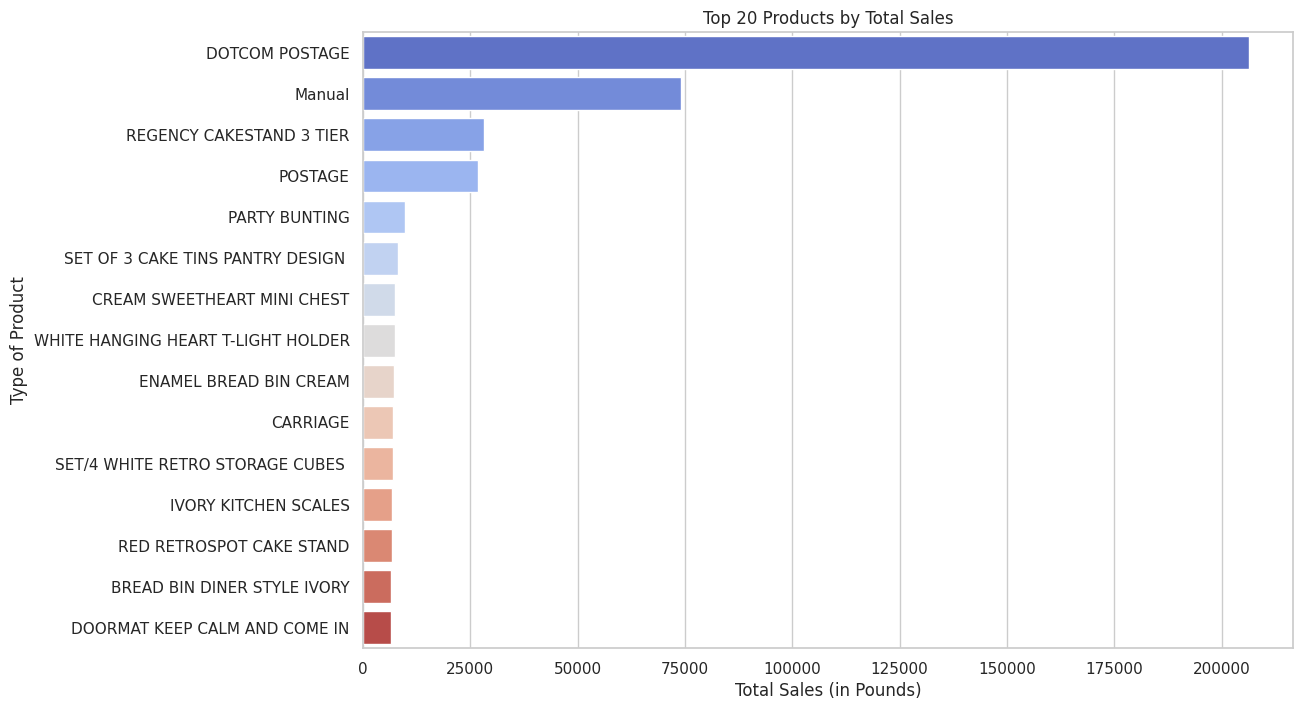

In [ ]:

sns.set(style="whitegrid")  #
top_products = clean_data.groupby('Description')['UnitPrice'].sum().nlargest(15)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.xlabel('Total Sales (in Pounds)')
plt.ylabel('Type of Product')
plt.title('Top 20 Products by Total Sales')
plt.show()



(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000')])

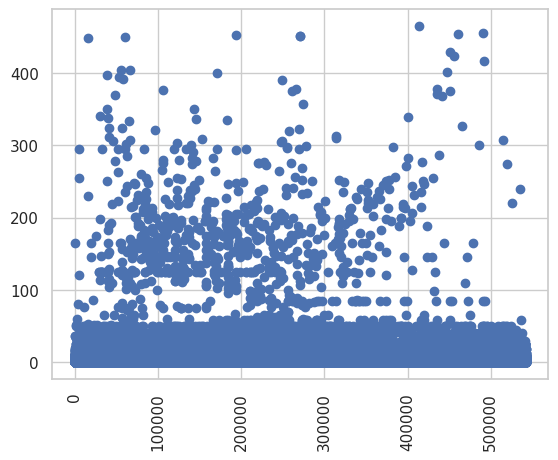

In [ ]:
df_quantile = clean_data[clean_data['UnitPrice'] < 465]
plt.scatter(x=df_quantile.index, y=df_quantile['UnitPrice'])
plt.xticks(rotation=90)

/tmp/ipython-input-1895518032.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_quantile[df_quantile['UnitPrice'] < 10]['UnitPrice'].values, kde=True, bins=10)


<Axes: ylabel='Density'>

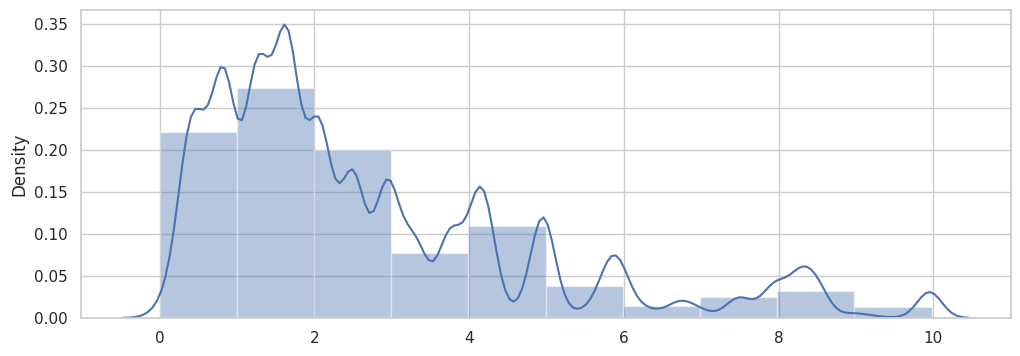

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 10]['UnitPrice'].values, kde=True, bins=10)

*From this density plot we can see that most of the items cost was in the range of 0-5 pounds*

/tmp/ipython-input-3042310741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity, y=quantity.index, palette="viridis")


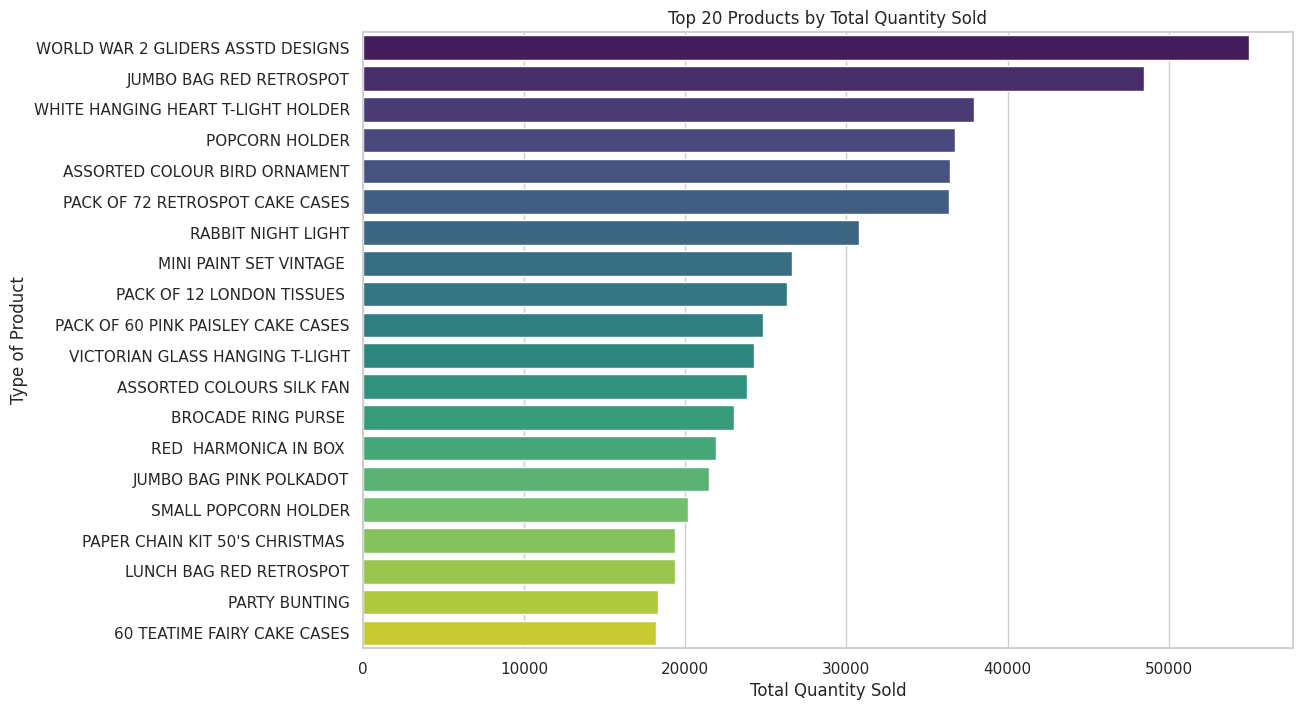

In [ ]:
quantity = clean_data.groupby('Description')['Quantity'].sum().nlargest(20)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=quantity, y=quantity.index, palette="viridis")
plt.xlabel('Total Quantity Sold')
plt.ylabel('Type of Product')
plt.title('Top 20 Products by Total Quantity Sold')
plt.show()


/tmp/ipython-input-4271493489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


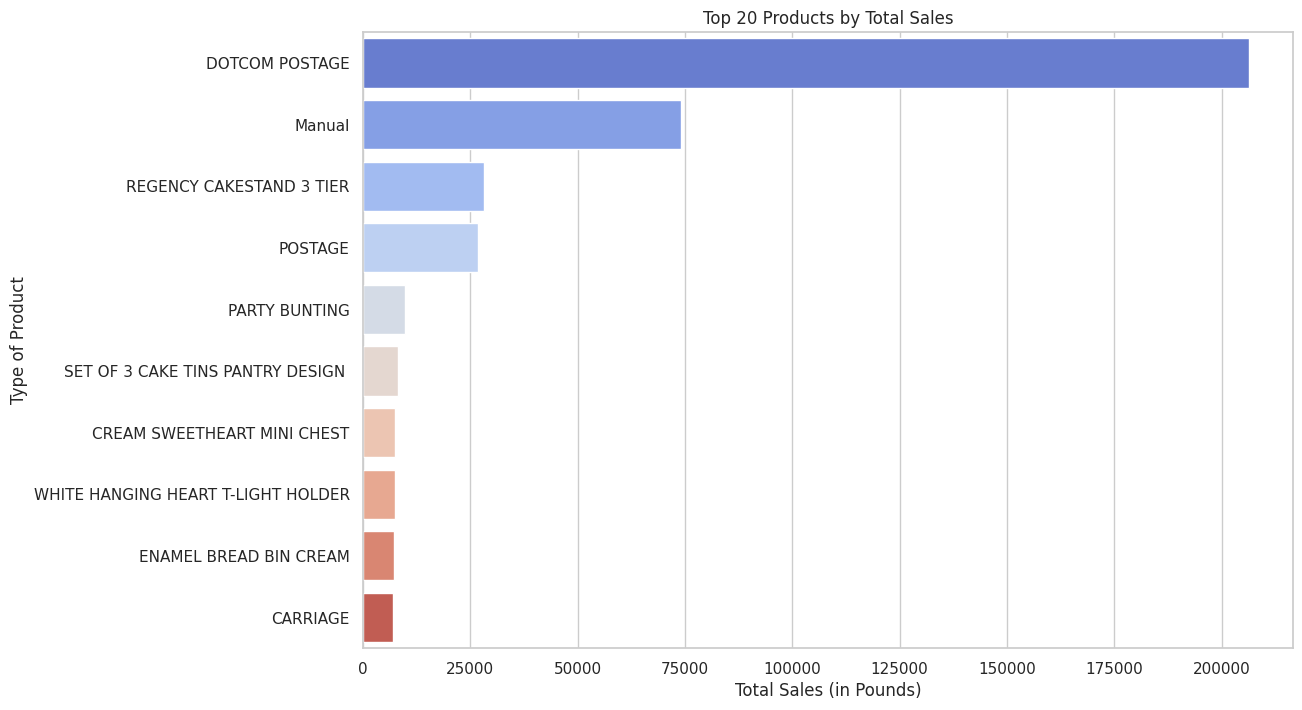

In [ ]:
sns.set(style="whitegrid")
top_products = clean_data.groupby('Description')['UnitPrice'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.xlabel('Total Sales (in Pounds)')
plt.ylabel('Type of Product')
plt.title('Top 20 Products by Total Sales')
plt.show()

**Time-Series Forecasting**

In [ ]:
clean_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pytimetk
import pytimetk as tk
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.8 MB/s eta 0:00:00
  Created wheel for supersmoother: filename=supersmoother-0.4-py3-none-any.whl size=16146 sha256=4d79a50de6e051ecdf07fb23472c0a1c54ecb4086771a4361040098ce158b1f1
  Stored in directory: /root/.cache/pip/wheels/69/4a/ff/05c85ded597955df839bedebe6dca56297c2568c04881d2e70
Successfully built supersmoother
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:

In [ ]:
# Assuming 'clean_data' is your DataFrame with a datetime index and 'TotalAmount' column
train = pd.DataFrame(clean_data[['Quantity', 'UnitPrice', 'InvoiceDate']])
train.head()




,Quantity,UnitPrice,InvoiceDate
0,6,2.55,2010-12-01 08:26:00
1,6,3.39,2010-12-01 08:26:00
2,8,2.75,2010-12-01 08:26:00
3,6,3.39,2010-12-01 08:26:00
4,6,3.39,2010-12-01 08:26:00


In [ ]:
train['InvoiceDate'] = pd.to_datetime(train['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')
train = train.set_index('InvoiceDate').resample('D').mean()
train.index.min()

Timestamp('2010-12-01 00:00:00')

In [ ]:
test = train.loc['2011-08-02':'2011-12-09']
train = train.loc['2010-12-01':'2011-08-01']

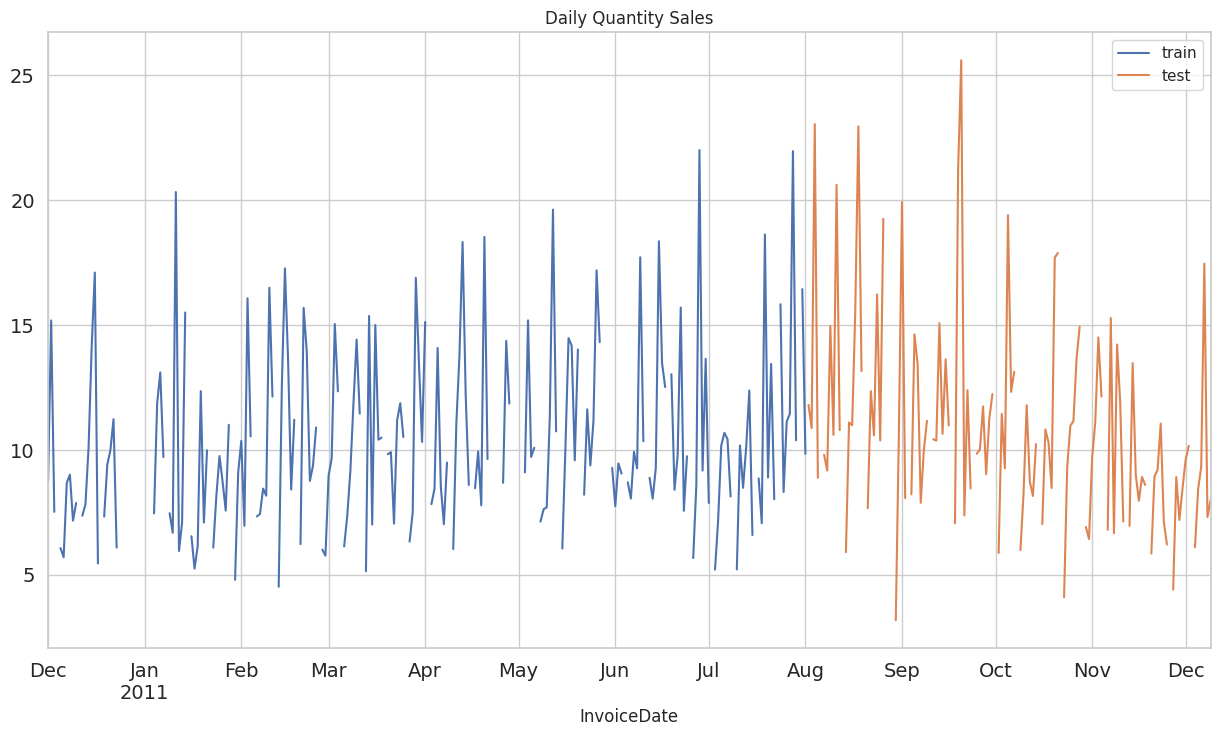

In [ ]:
train.Quantity.plot(figsize=(15,8), title= 'Daily Quantity Sales', fontsize=14, label='train')
test.Quantity.plot(figsize=(15,8), title= 'Daily Quantity Sales', fontsize=14, label='test')
plt.legend(loc='best')
plt.show()

In [ ]:
simple_avg = test.copy()
simple_avg['prediction'] = train['Quantity'].mean()

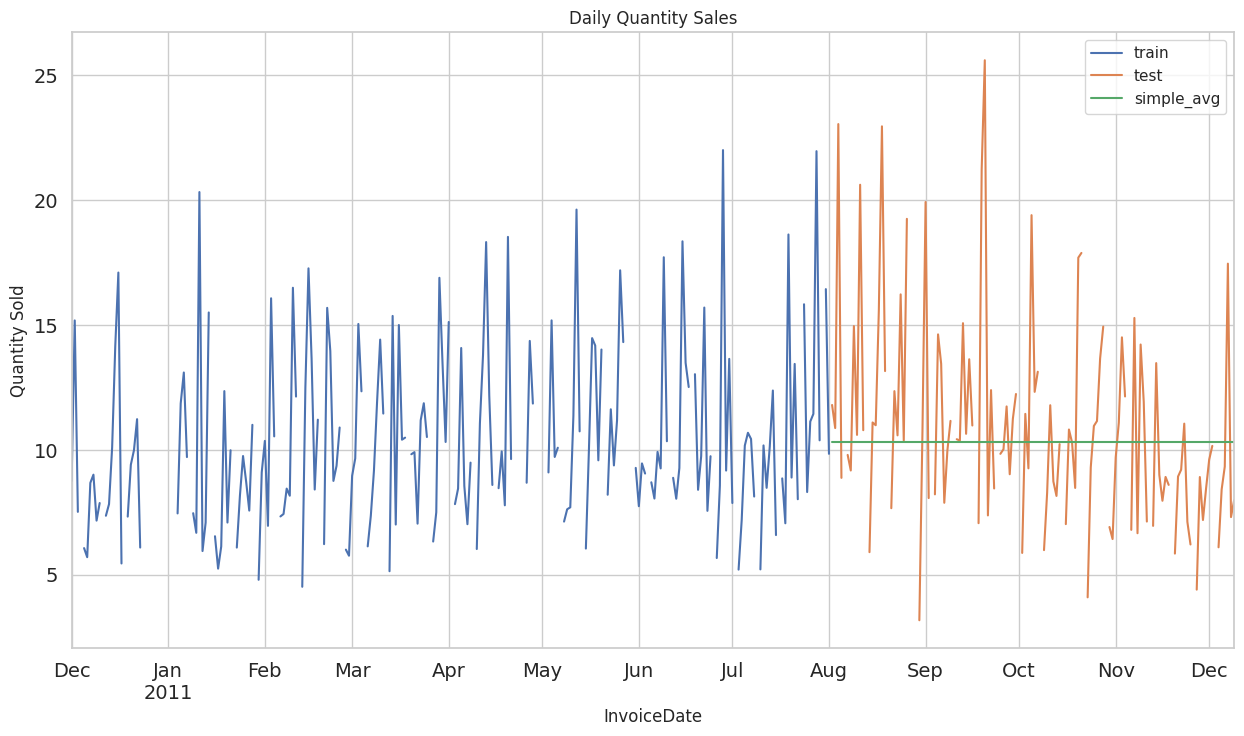

In [ ]:
train.Quantity.plot(figsize=(15,8), title= 'Daily Quantity Sales', fontsize=14, label='train')
test.Quantity.plot(figsize=(15,8), title= 'Daily Quantity Sales', fontsize=14, label='test')
simple_avg.prediction.plot(figsize=(15,8), title= 'Daily Quantity Sales', fontsize=14, label='simple_avg')
plt.legend(loc='best')
plt.ylabel('Quantity Sold')
plt.show()

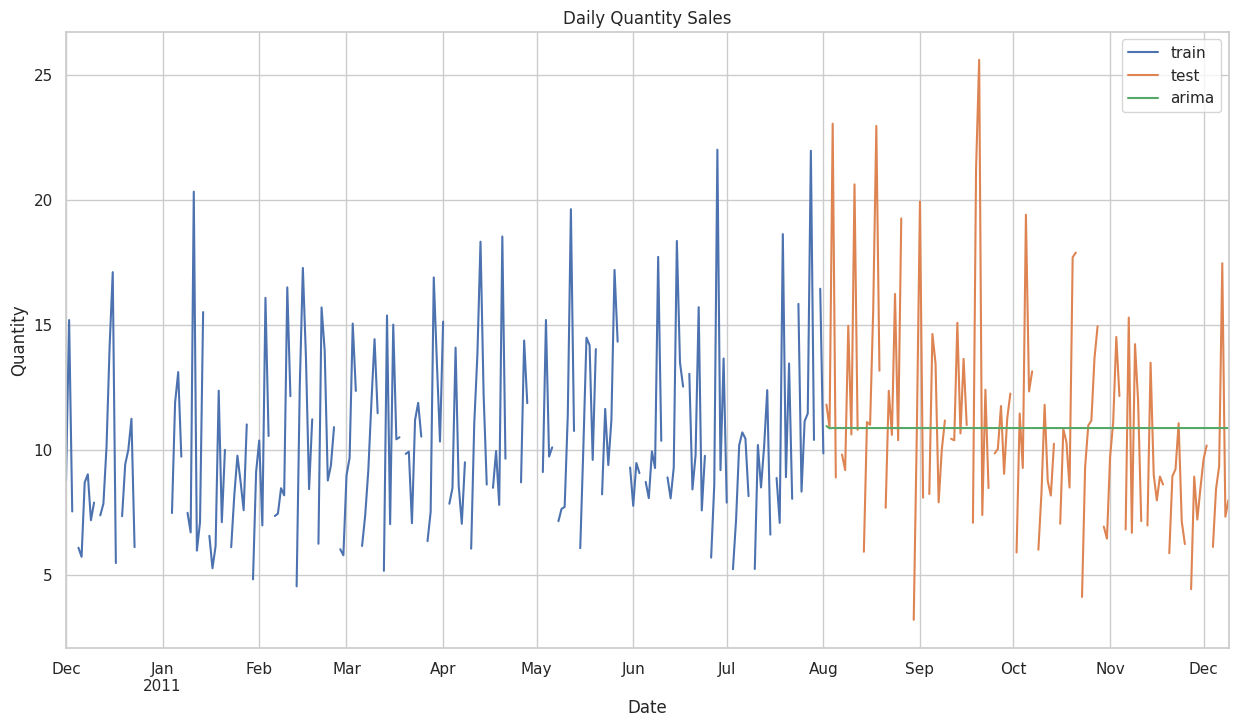

In [ ]:
arima = test.copy()
model = sm.tsa.ARIMA(train['Quantity'], order=(2, 1, 2))
results = model.fit()
arima['prediction'] = results.forecast(len(arima))
plt.figure(figsize=(15, 8))
train['Quantity'].plot(label='train')
test['Quantity'].plot(label='test')
arima['prediction'].plot(label='arima')

plt.title('Daily Quantity Sales')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend(loc='best')
plt.show()


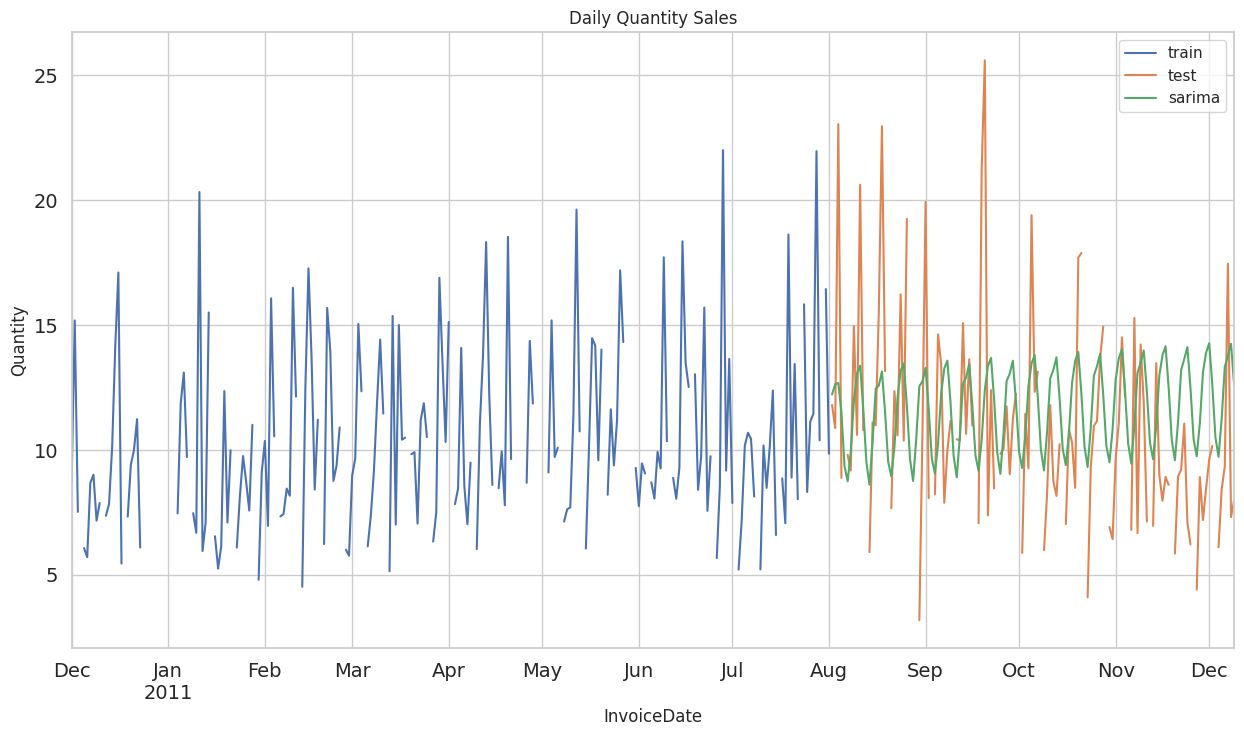

In [ ]:
sarima = test.copy()
model = sm.tsa.statespace.SARIMAX(train.Quantity, order=(2, 1, 2),seasonal_order=(2,1,2,7))
results = model.fit()
sarima['prediction'] = results.forecast(len(test))
train.Quantity.plot(figsize=(15,8), title= 'Daily Quantity Sales', fontsize=14, label='train')
test.Quantity.plot(figsize=(15,8), title= 'Daily Quantity Sales', fontsize=14, label='test')
sarima.prediction.plot(figsize=(15,8), title= 'Daily Quantity Sales', fontsize=14, label='sarima')
plt.ylabel('Quantity')
plt.legend(loc='best')
plt.show()